# Data Science Blog
## Driving Licenses, Traffic Accidents and Casualties Analysis (By Abdulrahman Alamri)

## 1.      Business Understanding

Traffic in Saudi Arabia considered one of the highest in the middle east region. Billions of Riyals were lost due to deal with this issue. Whether it is in the health care system or law enforcement that had to deal with accidents on a daily basis. As a humble attempt from me to understand the big picture and come up with solutions that can be given to the authorities that may contribute to their attempts to minimize the loss that is happing in souls, injuries and governmental cost.
In this project, the aim to investigate the data were given and see the patterns of accidents in all regions in Saudi Arabia. Also, define the factors that affect the accidents percentage and the type of casualties associated with it.


In this project, we have investigated the data were given and saw the patterns of accidents in all regions in Saudi Arabia. Also, defined the factors that affect the accidents percentage and the type of casualties associated with it. We have idientified the regions with highest number of licences, accidents, deaths, and injuries.

The basic steps of CRISP DM Framework are used in this project
1.      Business Understanding

2.      Data Understanding

3.      Data Preparation

4.      Modeling

5.      Evaluation

6.      Deployment

The steps number 4, 6 might not be needed since that we will not use machine learnning 

## Blog post:
I have written a blog in Medium about this project which can be found at:

https://medium.com/@azalamri3/saudi-arabia-traffic-accidents-and-casualties-analysis-1a5942b6db52

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2.      Data Understanding
[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


#### Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [81]:
dfl=pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', delimiter=';')
dft=pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',delimiter=';')
dfl.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"


In [82]:
dft.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"


In [83]:
dft

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


####  Display data

I'll Print the first 10 rows of each dataframe to your jupyter notebook

In [84]:
dfl.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [85]:
dft.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [86]:
print ('dfl.shape : ',dfl.shape, 'dft.shape : ',dft.shape)
# print ()

dfl.shape :  (350, 5) dft.shape :  (84, 7)


## 3.      Data Preparation


In [87]:
dfl.drop(columns=['Unnamed: 0'])
dft.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


#### Finding How complete is the data by investigating missing values.

In [88]:
print('dfl :', dfl.isnull().sum())
print('----------------------------------------------')
print('dft', dft.isnull().sum())

dfl : Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64
----------------------------------------------
dft Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64


In [89]:
# ## delete the null valuse in dataframe since they are a few compared to the dataframe
# dft = dft.dropna()
# dfl = dfl.dropna()

- #### from the missing data (NaN's) we can say that the data is good and has a very few null values in it

In [90]:
# dfl.head()

In [91]:
dfl

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [92]:
 print('dfl.columns are :', dfl.columns)
 print('dft.columns are :', dft.columns)

dfl.columns are : Index(['Unnamed: 0', 'Year', 'Administritive Area', 'Driving Liceses',
       'geo_point_2d'],
      dtype='object')
dft.columns are : Index(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'Region', 'Indicator', 'Value',
       'geo_point_2d'],
      dtype='object')


In [93]:
dfl.min()

Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

In [94]:
dfl.max()

Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object

In [95]:
dft.min()

Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object

In [96]:
dft.max()

Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object

In [1]:
# Display the data types of each feature. 
dft.info()

NameError: name 'dft' is not defined

In [98]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [99]:
dft.columns 

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'Region', 'Indicator', 'Value',
       'geo_point_2d'],
      dtype='object')

####  Fix incorrect data typesby using appropriate methods to re-type incorrectly typed data.
I'll define a function that will allow you to convert numerical columns to an appropriate numeric type

In [100]:
dfl['Driving Liceses']=dfl['Driving Liceses'].apply(lambda i: i.rstrip('n'))
dft['Value']=dft['Value'].apply(lambda i : i.rstrip('n'))


In [101]:
print(dft.dtypes)
print(dfl.dtypes)

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object
Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object


- Make new columns `x` and `y` using `geo_point_2d`


In [102]:
df1 = dfl.geo_point_2d.str.split(',', expand=True)
df2 = dft.geo_point_2d.str.split(',', expand=True)

dfl = dfl.join(df1)
dft= dft.join(df2)

dfl = dfl.rename(columns={0:'X', 1:'Y'})
dft = dft.rename(columns={0:'X', 1:'Y'})



print(dfl.head())
print(dft.head())

   Unnamed: 0    Year Administritive Area Driving Liceses  \
0           0  (2012)              Makkah          143954   
1           1  (1994)              Makkah           75349   
2           2  (1998)              Makkah           86082   
3           3  (2004)              Makkah           86636   
4           4  (2005)              Makkah           65099   

                  geo_point_2d             X               Y  
0  21.628962766, 41.2636898334  21.628962766   41.2636898334  
1  21.628962766, 41.2636898334  21.628962766   41.2636898334  
2  21.628962766, 41.2636898334  21.628962766   41.2636898334  
3  21.628962766, 41.2636898334  21.628962766   41.2636898334  
4  21.628962766, 41.2636898334  21.628962766   41.2636898334  
   Unnamed: 0  Unnamed: 0.1    Year          Region  \
0           0             0  (2016)          Makkah   
1           1             1  (2016)  Eastern Region   
2           2             2  (2016)          Tabouk   
3           3             3  (2016)

In [103]:

dfl.drop(columns = ['geo_point_2d'],inplace = True)
dft.drop(columns = ['geo_point_2d'],inplace = True)
# dft.drop(columns = ['geo_point_2d'], inplace=True)


In [104]:
dfl.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,X,Y
0,0,(2012),Makkah,143954,21.628962766,41.2636898334
1,1,(1994),Makkah,75349,21.628962766,41.2636898334
2,2,(1998),Makkah,86082,21.628962766,41.2636898334
3,3,(2004),Makkah,86636,21.628962766,41.2636898334
4,4,(2005),Makkah,65099,21.628962766,41.2636898334


In [105]:
dft.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,X,Y
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,3,3,(2016),Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,4,4,(2016),Hail,No. of Accidents,10199,27.400845724,41.4406960508


- Fix any individual values preventing other columns from being the appropriate type.

In [106]:
dfl['Year'] = dfl['Year'].map(lambda i : i.strip('()'))
dft['Year'] = dft['Year'].map(lambda i : i.strip('()'))

In [107]:
print(dfl.columns)
print(dft.columns)

Index(['Unnamed: 0', 'Year', 'Administritive Area', 'Driving Liceses', 'X',
       'Y'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'Region', 'Indicator', 'Value',
       'X', 'Y'],
      dtype='object')


In [108]:

dfl = dfl.drop(columns = ['Unnamed: 0'])
dft = dft.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

- Finish your data modifications by making sure the columns are now typed appropriately.

In [109]:
print(dfl.dtypes)
print(dft.dtypes)

Year                   object
Administritive Area    object
Driving Liceses        object
X                      object
Y                      object
dtype: object
Year         object
Region       object
Indicator    object
Value        object
X            object
Y            object
dtype: object


In [110]:
# dfl = dfl['Year'].apply(int)
dfl['Driving Liceses']=dfl['Driving Liceses'].apply(int)


In [111]:
dft.Year = dft.Year.apply(int)
dfl.Year = dfl.Year.apply(int)

In [112]:
dft.X=dft.X.apply(float)
dft.Y=dft.Y.apply(float)

In [113]:
dfl.X=dft.X.apply(float)
dfl.Y=dft.Y.apply(float)

In [114]:
# Display the data types again to confirm they are correct.
print(dfl.dtypes)
print(dft.dtypes)


Year                     int64
Administritive Area     object
Driving Liceses          int64
X                      float64
Y                      float64
dtype: object
Year           int64
Region        object
Indicator     object
Value         object
X            float64
Y            float64
dtype: object


lets Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes).

In [115]:
dft

,Year,Region,Indicator,Value,X,Y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696
5,2016,Northern Boarder,No. of Casualties - Dead,193,30.197075,41.817119
6,2017,Jazan,No. of Accidents,22161,17.207231,42.652581
7,2017,Al-Jouf,No. of Accidents,10469,29.967745,39.557037
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN
9,2016,Northern Boarder,No. of Casualties - Injured,631,30.197075,41.817119


In [116]:
dfl = dfl.rename(columns = {'Year': 'year', 'Administritive Area': 'region', 'Driving Liceses':'driving_licenses', 'X':'x', 'Y':'y'})
dfl.head()

,year,region,driving_licenses,x,y
0,2012,Makkah,143954,21.628963,41.263690
1,1994,Makkah,75349,23.288331,50.147830
2,1998,Makkah,86082,27.901655,37.259858
3,2004,Makkah,86636,27.400846,41.440696
4,2005,Makkah,65099,27.400846,41.440696


In [117]:
dft = dft.rename(columns ={'Year':'year', 'Region':'region', 'Indicator':'indicator', 'Value':'value', 'X':'x', 'Y':'y'})
dft.head()

,year,region,indicator,value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [118]:
# unify the regions name across the both data frames:

dfl['region'] = dfl['region'].replace(['Al-Qaseem' , 'Eastern' , 'Assir'] , ['Al-Qassim' , 'Eastern Region', 'Asir'])

dft['region'] = dft['region'].replace(['Qassim' , 'Al-Baaha'] ,['Al-Qassim' , 'Al-Baha'])

In [119]:
# change the name of the adminstrative area to 'region' in dfl 
dfl = dfl.rename(columns = {'administrative_area':'region'})
# check 
dfl.head(1)

,year,region,driving_licenses,x,y
0,2012,Makkah,143954,21.628963,41.26369


####  Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.


#### dfl description:
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|*object*|2saudi-arabia-driving-licenses-2004-2008.csv|The year in which the licence was issued.| 
|**administrative_area**|*object*|2saudi-arabia-driving-licenses-2004-2008.csv|Region where the licence issued.|
|**driving_licenses**|*object*|2saudi-arabia-driving-licenses-2004-2008.csv|no. of Licences number.|
|**x**|*float*|2saudi-arabia-driving-licenses-2004-2008.csv|Longtitude coordinate|
|**y**|*float*|2saudi-arabia-driving-licenses-2004-2008.csv|Latitude coordinate|

#### dft description:
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|*object*|saudi-arabia-traffic-accidents-2008.csv|The year in which the accident happened.| 
|**region**|*object*|saudi-arabia-traffic-accidents-2008.csv|Region where the accident happen issued.|
|**driving_licenses**|*object*|saudi-arabia-traffic-accidents-2008.csv|Licence number.|
|**indicator**|*object*|saudi-arabia-traffic-accidents-2008.csv| Type of casualty (dead or injured).|
|**value**|*object*|saudi-arabia-traffic-accidents-2008.csv| value that correspond to the type of casualty.|
|**x**|*float*|saudi-arabia-traffic-accidents-2008.csv|Longtitude coordinate|
|**y**|*float*|saudi-arabia-traffic-accidents-2008.csv|Latitude coordinate|

####  Drop unnecessary rows

This study concerns accident and license in regions/area. So I'll do the followings:
1. check which rows are not associated with regions?
2. Confirm the numbers of all regions add up to total.
3. Remove the rows that are not associated with regions

- #### the rows in which the region is == 'Total'


In [120]:
dfl[dfl.region == 'Total']

,year,region,driving_licenses,x,y
58,2015,Total,435439,30.197075,41.817119
59,2017,Total,928165,17.207231,42.652581
60,1993,Total,294893,18.451100,46.868850
61,1994,Total,303520,24.927535,39.491824
62,2003,Total,254858,26.196706,43.343000
63,2006,Total,267508,23.288331,50.147830
142,2014,Total,625414,NaN,NaN
143,2010,Total,386510,NaN,NaN
144,2012,Total,411204,NaN,NaN
145,1999,Total,332210,NaN,NaN


In [121]:
b= dfl[dfl.region != 'Total'].sum()
b

year                                                           651625
region              MakkahMakkahMakkahMakkahMakkahMakkahMadinahMad...
driving_licenses                                              9397488
x                                                             1716.95
y                                                              3058.7
dtype: object

- #### The sum of value in # driving licenses = 9397488 , if subtract from the whole value (i.e. including the regiosn with 'Total' it should give the same value.

In [122]:
a = list(dfl.groupby('region')['driving_licenses'].sum())
sum(a)-9397488 


9397488

In [123]:
dfl[dfl.region != 'Total']

,year,region,driving_licenses,x,y
0,2012,Makkah,143954,21.628963,41.263690
1,1994,Makkah,75349,23.288331,50.147830
2,1998,Makkah,86082,27.901655,37.259858
3,2004,Makkah,86636,27.400846,41.440696
4,2005,Makkah,65099,27.400846,41.440696
5,2008,Makkah,77013,30.197075,41.817119
6,2014,Madinah,31447,17.207231,42.652581
7,2013,Madinah,28513,29.967745,39.557037
8,2012,Madinah,14459,NaN,NaN
9,1994,Madinah,3767,30.197075,41.817119


- ####  Keep dfl in wide form and transform dft to wide format to make it more representitive. 

In [124]:
dfl.head()

,year,region,driving_licenses,x,y
0,2012,Makkah,143954,21.628963,41.263690
1,1994,Makkah,75349,23.288331,50.147830
2,1998,Makkah,86082,27.901655,37.259858
3,2004,Makkah,86636,27.400846,41.440696
4,2005,Makkah,65099,27.400846,41.440696


In [125]:
dft.head()

,year,region,indicator,value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [126]:
dfl

,year,region,driving_licenses,x,y
0,2012,Makkah,143954,21.628963,41.263690
1,1994,Makkah,75349,23.288331,50.147830
2,1998,Makkah,86082,27.901655,37.259858
3,2004,Makkah,86636,27.400846,41.440696
4,2005,Makkah,65099,27.400846,41.440696
5,2008,Makkah,77013,30.197075,41.817119
6,2014,Madinah,31447,17.207231,42.652581
7,2013,Madinah,28513,29.967745,39.557037
8,2012,Madinah,14459,NaN,NaN
9,1994,Madinah,3767,30.197075,41.817119


In [127]:
pivot_dft = dft.pivot_table(index=['year','region'],columns='indicator', values='value',aggfunc={'value':np.sum})
pivot_dft

indicator             No. of Accidents No. of Casualties - Dead  \
year region                                                       
2016 Al-Baha                      3618                      185   
     Al-Jouf                     10212                      245   
     Al-Qassim                   25664                      397   
     Asir                        32684                      983   
     Eastern Region             101619                     1113   
     Hail                        10199                      299   
     Jazan                       25873                      514   
     Madinah                     14475                      822   
     Makkah                     134838                     2243   
     Najran                       3235                      173   
     Northern Boarder            13196                      193   
     Riyadh                     141736                     1430   
     Tabouk                      16031                      434   
     Total                      533380                     9031   
2017 Al-Baha                      1414                      134   
     Al-Jouf                     10469                      240   
     Al-Qassim                   22405                      319   
     Asir                        25245                      828   
     Eastern Region              81433                      963   
     Hail                         9379                      265   
     Jazan                       22161                      466   
     Madinah                     16070                      580   
     Makkah                     145541                     1641   
     Najran                       3193                      194   
     Northern Boarder            11540                      112   
     Riyadh                      99925                     1399   
     Tabouk                      11713                      348   
     Total                      460488                     7489   

indicator             No. of Casualties - Injured  
year region                                        
2016 Al-Baha                                 1227  
     Al-Jouf                                  920  
     Al-Qassim                               1513  
     Asir                                    2541  
     Eastern Region                          4893  
     Hail                                     932  
     Jazan                                   2259  
     Madinah                                 4184  
     Makkah                                 12383  
     Najran                                   706  
     Northern Boarder                         631  
     Riyadh                                  4207  
     Tabouk                                  1724  
     Total                                  38120  
2017 Al-Baha                                 1007  
     Al-Jouf                                  862  
     Al-Qassim                               1446  
     Asir                                    2368  
     Eastern Region                          4073  
     Hail                                     773  
     Jazan                                   2207  
     Madinah                                 2917  
     Makkah                                 10623  
     Najran                                   766  
     Northern Boarder                         374  
     Riyadh                                  4540  
     Tabouk                                  1243  
     Total                                  33199

In [128]:
pivot_dft.reset_index(inplace= True)
pivot_dft

indicator,year,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baha,3618,185,1227
1,2016,Al-Jouf,10212,245,920
2,2016,Al-Qassim,25664,397,1513
3,2016,Asir,32684,983,2541
4,2016,Eastern Region,101619,1113,4893
5,2016,Hail,10199,299,932
6,2016,Jazan,25873,514,2259
7,2016,Madinah,14475,822,4184
8,2016,Makkah,134838,2243,12383
9,2016,Najran,3235,173,706


In [129]:
pivot_dft = pivot_dft.rename(columns = {'No. of Accidents': 'no_of_accidents', 'No. of Casualties - Dead':'Dead', 'No. of Casualties - Injured':'Injured'})
pivot_dft.head(2)

indicator,year,region,no_of_accidents,Dead,Injured
0,2016,Al-Baha,3618,185,1227
1,2016,Al-Jouf,10212,245,920


In [130]:
print(pivot_dft[pivot_dft.region!='Total'].shape)
# print(pivot_dfl.shape)


(26, 5)


####  Merge dataframes

I'll Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key.

In [131]:
piv_mg = pd.merge(dfl,pivot_dft, left_on=['year', 'region'],right_on=['year', 'region'])
piv_mg

,year,region,driving_licenses,x,y,no_of_accidents,Dead,Injured
0,2017,Hail,22035,17.207231,42.652581,9379,265,773
1,2017,Northern Boarder,5280,23.288331,50.147830,11540,112,374
2,2016,Al-Baha,4614,27.400846,41.440696,3618,185,1227
3,2017,Total,928165,17.207231,42.652581,460488,7489,33199
4,2017,Al-Qassim,6318,NaN,NaN,22405,319,1446
5,2017,Eastern Region,126816,NaN,NaN,81433,963,4073
6,2017,Tabouk,10232,NaN,NaN,11713,348,1243
7,2016,Northern Boarder,4958,NaN,NaN,13196,193,631
8,2016,Najran,2153,NaN,NaN,3235,173,706
9,2017,Makkah,142487,NaN,NaN,145541,1641,10623


In [132]:
piv_mg.shape

(28, 8)

In [133]:
piv_mg

,year,region,driving_licenses,x,y,no_of_accidents,Dead,Injured
0,2017,Hail,22035,17.207231,42.652581,9379,265,773
1,2017,Northern Boarder,5280,23.288331,50.147830,11540,112,374
2,2016,Al-Baha,4614,27.400846,41.440696,3618,185,1227
3,2017,Total,928165,17.207231,42.652581,460488,7489,33199
4,2017,Al-Qassim,6318,NaN,NaN,22405,319,1446
5,2017,Eastern Region,126816,NaN,NaN,81433,963,4073
6,2017,Tabouk,10232,NaN,NaN,11713,348,1243
7,2016,Northern Boarder,4958,NaN,NaN,13196,193,631
8,2016,Najran,2153,NaN,NaN,3235,173,706
9,2017,Makkah,142487,NaN,NaN,145541,1641,10623


In [134]:
piv_mg['driving_licenses']= piv_mg['driving_licenses'].apply(int)
piv_mg['no_of_accidents']= piv_mg['no_of_accidents'].apply(int)
piv_mg['Dead']= piv_mg['Dead'].apply(int)
piv_mg['Injured']= piv_mg['Injured'].apply(int)


####  Save the cleaned, merged dataframe

I'll use a relative path to save out your data as `combined_datasets.csv`.

In [135]:
piv_mg.head()

,year,region,driving_licenses,x,y,no_of_accidents,Dead,Injured
0,2017,Hail,22035,17.207231,42.652581,9379,265,773
1,2017,Northern Boarder,5280,23.288331,50.147830,11540,112,374
2,2016,Al-Baha,4614,27.400846,41.440696,3618,185,1227
3,2017,Total,928165,17.207231,42.652581,460488,7489,33199
4,2017,Al-Qassim,6318,NaN,NaN,22405,319,1446


In [136]:
piv_mg=piv_mg[piv_mg.region!='Total']

In [137]:
piv_mg.to_csv('../data/combined_datasets.csv',index=False)

## 5.      Evaluation


In [138]:
piv_mg.describe()

,year,driving_licenses,x,y,no_of_accidents,Dead,Injured
count,26.000000,26.000000,3.000000,3.000000,26.000000,26.000000,26.000000
mean,2016.500000,62507.000000,22.632136,44.747036,38225.692308,635.384615,2743.038462
std,0.509902,107293.917762,5.128390,4.716312,46493.705035,549.783381,2922.641127
min,2016.000000,2153.000000,17.207231,41.440696,1414.000000,112.000000,374.000000
25%,2016.000000,8363.250000,20.247781,42.046638,10276.250000,241.250000,923.000000
50%,2016.500000,16085.000000,23.288331,42.652581,16050.500000,415.500000,1618.500000
75%,2017.000000,51222.000000,25.344588,46.400205,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,27.400846,50.147830,145541.000000,2243.000000,12383.000000


In [139]:
df_merg= piv_mg

In [140]:
def std_(x) :
    std =np.sqrt(np.mean(abs(x-x.mean())**2))
    return std

In [141]:
std = {'year':df_merg[['year']].apply(std_,axis =0)[0],'driving_licenses':df_merg[['driving_licenses']].apply(std_,axis =0)[0],'x':df_merg[['x']].apply(std_,axis =0)[0],'y':df_merg[['y']].apply(std_,axis =0)[0],'no_of_accidents':df_merg[['no_of_accidents']].apply(std_,axis =0)[0],'Dead':df_merg[['Dead']].apply(std_,axis =0)[0],'Injured':df_merg[['Injured']].apply(std_,axis =0)[0]}

std

{'year': 0.5,
 'driving_licenses': 105210.34237659337,
 'x': 4.187313136793928,
 'y': 3.8508529423815108,
 'no_of_accidents': 45590.82869880505,
 'Dead': 539.1069593406002,
 'Injured': 2865.885411322023}

In [142]:
np.std(df_merg)

year                     0.500000
driving_licenses    105210.342377
x                        4.187313
y                        3.850853
no_of_accidents      45590.828699
Dead                   539.106959
Injured               2865.885411
dtype: float64

In [143]:
df_merg.describe()

,year,driving_licenses,x,y,no_of_accidents,Dead,Injured
count,26.000000,26.000000,3.000000,3.000000,26.000000,26.000000,26.000000
mean,2016.500000,62507.000000,22.632136,44.747036,38225.692308,635.384615,2743.038462
std,0.509902,107293.917762,5.128390,4.716312,46493.705035,549.783381,2922.641127
min,2016.000000,2153.000000,17.207231,41.440696,1414.000000,112.000000,374.000000
25%,2016.000000,8363.250000,20.247781,42.046638,10276.250000,241.250000,923.000000
50%,2016.500000,16085.000000,23.288331,42.652581,16050.500000,415.500000,1618.500000
75%,2017.000000,51222.000000,25.344588,46.400205,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,27.400846,50.147830,145541.000000,2243.000000,12383.000000


#### Investigate trends in the data


- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?


In [144]:
pivot_dft['no_of_accidents']=pivot_dft['no_of_accidents'].apply(int)

In [145]:
investigation= dfl.groupby(['region','year'],as_index=False)[['driving_licenses']].sum()
investigation

,region,year,driving_licenses
0,Al-Baha,1993,3270
1,Al-Baha,1994,2729
2,Al-Baha,1995,2423
3,Al-Baha,1996,1468
4,Al-Baha,1997,3027
5,Al-Baha,1998,5110
6,Al-Baha,1999,4246
7,Al-Baha,2000,4832
8,Al-Baha,2001,7594
9,Al-Baha,2002,3335


In [146]:
investigation.nsmallest(10, columns='driving_licenses', keep= 'all')

,region,year,driving_licenses
322,Tabouk,2015,915
14,Al-Baha,2007,997
252,Northern Boarder,1995,1318
253,Northern Boarder,1996,1383
251,Northern Boarder,1994,1457
3,Al-Baha,1996,1468
250,Northern Boarder,1993,1510
254,Northern Boarder,1997,1531
260,Northern Boarder,2003,1705
262,Northern Boarder,2005,1804


- #### For years (1993 - 2017), it looks  like the following regions has lowest number of driving licences: 'Tabouk', 'Al-Baha','Northern Boarder'

In [147]:
investigation.nlargest(10, columns='driving_licenses', keep= 'all')

,region,year,driving_licenses
349,Total,2017,928165
348,Total,2016,697017
346,Total,2014,625414
345,Total,2013,565314
299,Riyadh,2017,495307
347,Total,2015,435439
344,Total,2012,411204
343,Total,2011,400558
342,Total,2010,386510
341,Total,2009,376275


- #### For years (1993 - 2017), it looks  like Riyadh region has the highest number of driving licences issued!

In [148]:
investigation1= pivot_dft.groupby(['region','year'],as_index=False)[['no_of_accidents','Dead', 'Injured']].sum()
investigation1

indicator,region,year,no_of_accidents
0,Al-Baha,2016,3618
1,Al-Baha,2017,1414
2,Al-Jouf,2016,10212
3,Al-Jouf,2017,10469
4,Al-Qassim,2016,25664
5,Al-Qassim,2017,22405
6,Asir,2016,32684
7,Asir,2017,25245
8,Eastern Region,2016,101619
9,Eastern Region,2017,81433


In [149]:
investigation1.nsmallest(10, columns='no_of_accidents', keep= 'all')

indicator,region,year,no_of_accidents
1,Al-Baha,2017,1414
19,Najran,2017,3193
18,Najran,2016,3235
0,Al-Baha,2016,3618
11,Hail,2017,9379
10,Hail,2016,10199
2,Al-Jouf,2016,10212
3,Al-Jouf,2017,10469
21,Northern Boarder,2017,11540
25,Tabouk,2017,11713


- #### For years (2016 & 2017), it looks  like the following regions has lowest number of Accidents: 'Al-Baha','Najran','Hail'

In [150]:
investigation1.nlargest(10, columns='no_of_accidents', keep= 'all')

indicator,region,year,no_of_accidents
26,Total,2016,533380
27,Total,2017,460488
17,Makkah,2017,145541
22,Riyadh,2016,141736
16,Makkah,2016,134838
8,Eastern Region,2016,101619
23,Riyadh,2017,99925
9,Eastern Region,2017,81433
6,Asir,2016,32684
12,Jazan,2016,25873


- #### For years (2016 & 2017), it looks  like the following regions has highest number of Accidents:'Makkah', 'Riyadh', 'Eastern Region', 'Eastern Region'

In [151]:
investigation2= dfl.groupby(['region','year'],as_index=False)[['driving_licenses']].mean()


In [152]:
investigation2.nsmallest(10, columns='driving_licenses', keep= 'all')

,region,year,driving_licenses
322,Tabouk,2015,915
14,Al-Baha,2007,997
252,Northern Boarder,1995,1318
253,Northern Boarder,1996,1383
251,Northern Boarder,1994,1457
3,Al-Baha,1996,1468
250,Northern Boarder,1993,1510
254,Northern Boarder,1997,1531
260,Northern Boarder,2003,1705
262,Northern Boarder,2005,1804


- #### For years (1993 - 2017), it looks  like 'Tabouk', 'Al-Baha', 'Northern Boarder' region has the lowest number of driving licences issued!


In [153]:
investigation.nlargest(10, columns='driving_licenses', keep= 'all')

,region,year,driving_licenses
349,Total,2017,928165
348,Total,2016,697017
346,Total,2014,625414
345,Total,2013,565314
299,Riyadh,2017,495307
347,Total,2015,435439
344,Total,2012,411204
343,Total,2011,400558
342,Total,2010,386510
341,Total,2009,376275


- #### For years (1993 - 2017), it looks  like 'Riyadh' region has the highest number of driving licences issued!


In [154]:
investigation3= pivot_dft.groupby(['region','year'],as_index=False)[['no_of_accidents']].sum()
investigation3

indicator,region,year,no_of_accidents
0,Al-Baha,2016,3618
1,Al-Baha,2017,1414
2,Al-Jouf,2016,10212
3,Al-Jouf,2017,10469
4,Al-Qassim,2016,25664
5,Al-Qassim,2017,22405
6,Asir,2016,32684
7,Asir,2017,25245
8,Eastern Region,2016,101619
9,Eastern Region,2017,81433


In [155]:
investigation3.nsmallest(10, columns='no_of_accidents', keep= 'all')

indicator,region,year,no_of_accidents
1,Al-Baha,2017,1414
19,Najran,2017,3193
18,Najran,2016,3235
0,Al-Baha,2016,3618
11,Hail,2017,9379
10,Hail,2016,10199
2,Al-Jouf,2016,10212
3,Al-Jouf,2017,10469
21,Northern Boarder,2017,11540
25,Tabouk,2017,11713


- #### For years (2016 & 2017), it looks  like 'Al-Baha', 'Najran',  'Hail' regions has the lowest number of accidents!


In [156]:
investigation3.nlargest(10, columns='no_of_accidents', keep= 'all')

indicator,region,year,no_of_accidents
26,Total,2016,533380
27,Total,2017,460488
17,Makkah,2017,145541
22,Riyadh,2016,141736
16,Makkah,2016,134838
8,Eastern Region,2016,101619
23,Riyadh,2017,99925
9,Eastern Region,2017,81433
6,Asir,2016,32684
12,Jazan,2016,25873


In [157]:
investigation3= investigation3[investigation3['year'] ==2016]
investigation3

indicator,region,year,no_of_accidents
0,Al-Baha,2016,3618
2,Al-Jouf,2016,10212
4,Al-Qassim,2016,25664
6,Asir,2016,32684
8,Eastern Region,2016,101619
10,Hail,2016,10199
12,Jazan,2016,25873
14,Madinah,2016,14475
16,Makkah,2016,134838
18,Najran,2016,3235


- #### For years (2016 & 2017), it looks  like 'Al-Baha', 'Najran',  'Hail' regions has the highest number of accidents!


In [167]:
piv_mg
# print(piv_mg.Injured.max())

,year,region,driving_licenses,x,y,no_of_accidents,Dead,Injured
0,2017,Hail,22035,17.207231,42.652581,9379,265,773
1,2017,Northern Boarder,5280,23.288331,50.147830,11540,112,374
2,2016,Al-Baha,4614,27.400846,41.440696,3618,185,1227
4,2017,Al-Qassim,6318,NaN,NaN,22405,319,1446
5,2017,Eastern Region,126816,NaN,NaN,81433,963,4073
6,2017,Tabouk,10232,NaN,NaN,11713,348,1243
7,2016,Northern Boarder,4958,NaN,NaN,13196,193,631
8,2016,Najran,2153,NaN,NaN,3235,173,706
9,2017,Makkah,142487,NaN,NaN,145541,1641,10623
10,2016,Makkah,136055,NaN,NaN,134838,2243,12383


## Visualize the data



Text(0.5, 1.0, 'Correlation between Feature')

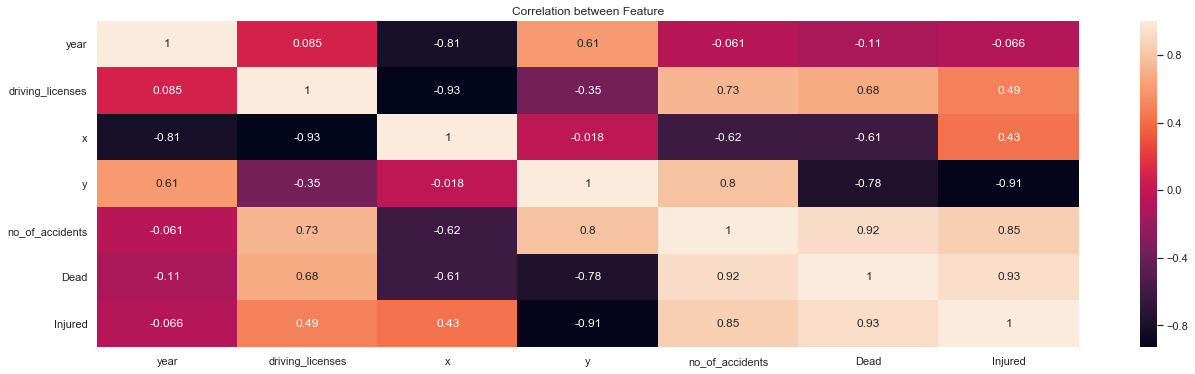

In [236]:
from matplotlib.pyplot import figure, plot
df_mg = df_merg.corr()
sns.heatmap(df_mg , annot= True).set_title('Correlation between Feature')

In [237]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title ( list_of_titles[i])        
        ax[i].set_xlabel ( list_of_xlabels[i])  

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

In [238]:
df_mg.columns

Index(['year', 'driving_licenses', 'x', 'y', 'no_of_accidents', 'Dead',
       'Injured'],
      dtype='object')

In [239]:
from matplotlib.pyplot import figure, plot


<Figure size 640x480 with 0 Axes>

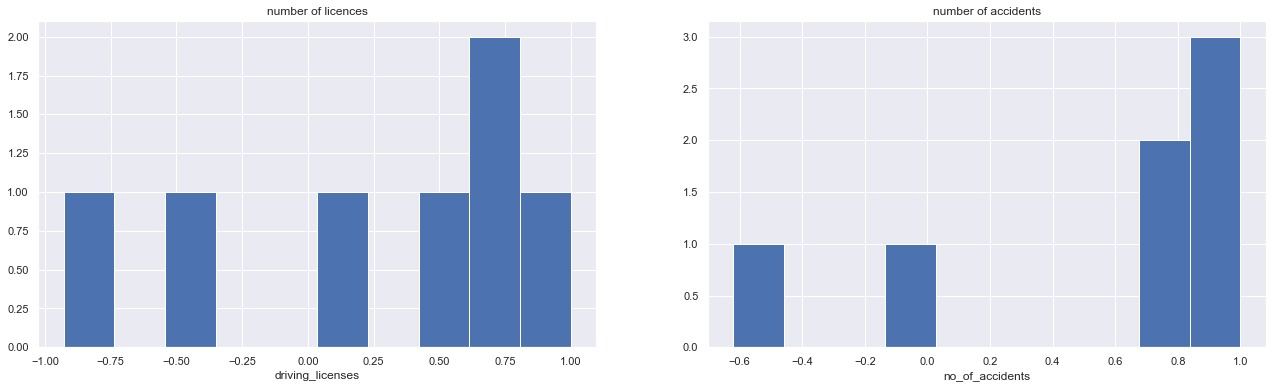

In [240]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
subplot_histograms(df_mg, list_of_columns=['driving_licenses','no_of_accidents'], list_of_titles=['number of licences','number of accidents'],list_of_xlabels=['driving_licenses','no_of_accidents'] )


None


<Figure size 640x480 with 0 Axes>

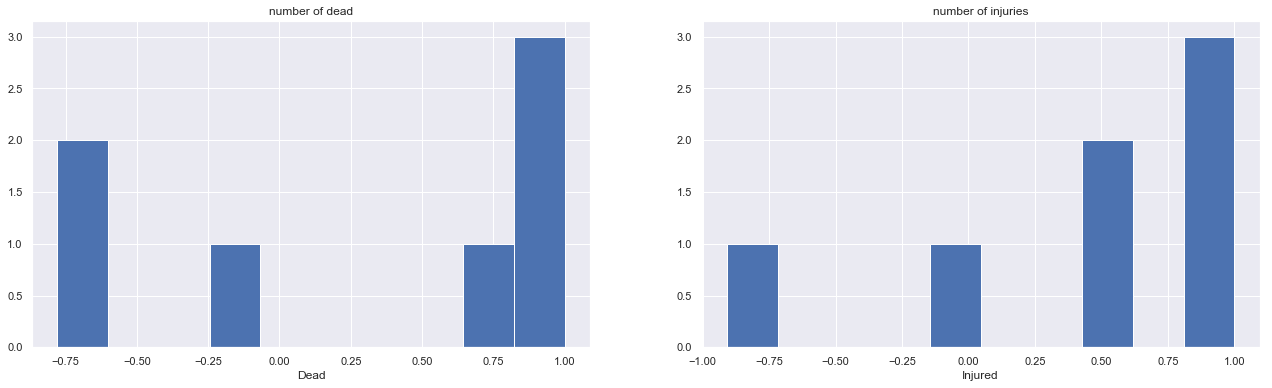

In [241]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# subplot_histograms(df_mg, list_of_columns=['driving_licenses','no_of_accidents','Dead','Injured'], list_of_titles=['number of licences','number of accidents', 'number of dead', 'number of injuries'],list_of_xlabels=['driving_licenses','no_of_accidents','Dead','Injured'] )
# print(subplot_histograms(df_mg, list_of_columns=['driving_licenses','no_of_accidents'], list_of_titles=['number of licences','number of accidents'],list_of_xlabels=['driving_licenses','no_of_accidents'] ))
print(subplot_histograms(df_mg, list_of_columns=['Dead','Injured'], list_of_titles=['number of dead', 'number of injuries'],list_of_xlabels=['Dead','Injured'] ))

# plt.show()

I'll plot and interpret the answer for each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017


Text(0, 0.5, 'no_of_accidents')

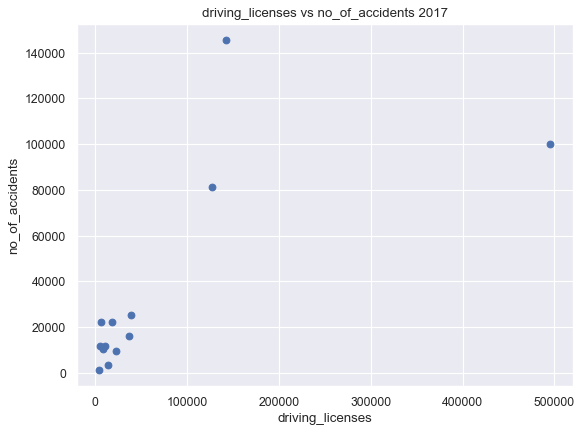

In [242]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pv_mg_2017=piv_mg[(piv_mg.year==2017)]
pv_mg_2016=piv_mg[(piv_mg.year==2016)]
# fig.figure(fi)
plt.scatter(x='driving_licenses', y='no_of_accidents', data=pv_mg_2017)
plt.title('driving_licenses vs no_of_accidents 2017')
plt.xlabel('driving_licenses')
plt.ylabel('no_of_accidents')

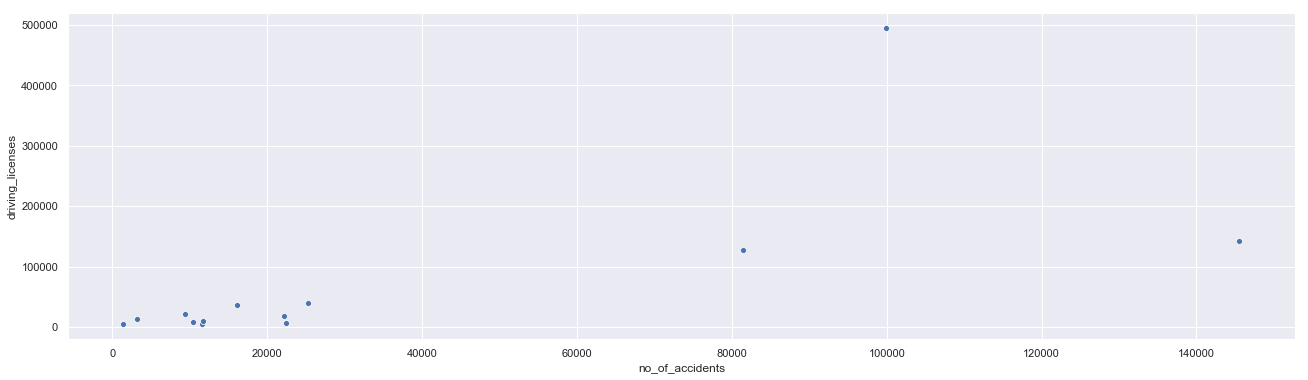

In [243]:
df_mg_2017 = piv_mg[piv_mg['year']==2017]
# fig.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(x ='no_of_accidents', y = 'driving_licenses', data =df_mg_2017)

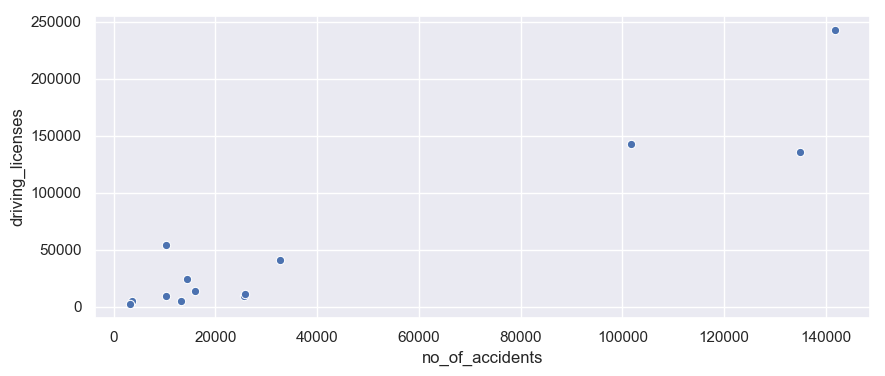

In [244]:
df_mg_2016 = piv_mg[piv_mg['year']==2016]
figure(num=None, figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k')
sns.scatterplot(x ='no_of_accidents', y = 'driving_licenses', data =df_mg_2016)

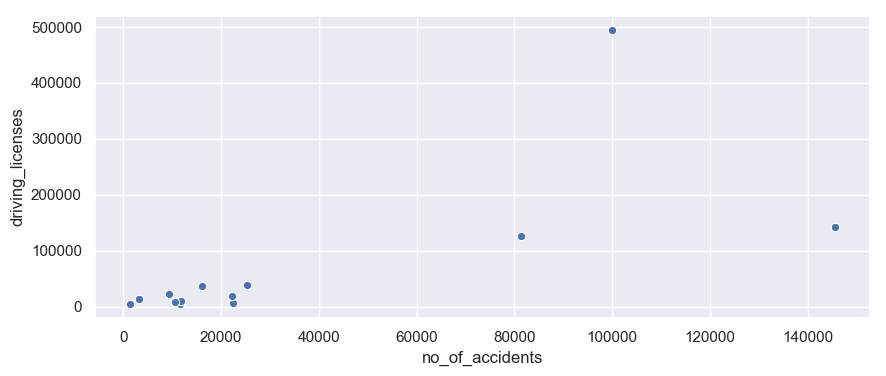

In [245]:
df_mg_2017 = piv_mg[piv_mg['year']==2017]
figure(num=None, figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k')
sns.scatterplot(x ='no_of_accidents', y = 'driving_licenses', data =df_mg_2017)

Text(0.5, 1.0, 'Boxplot')

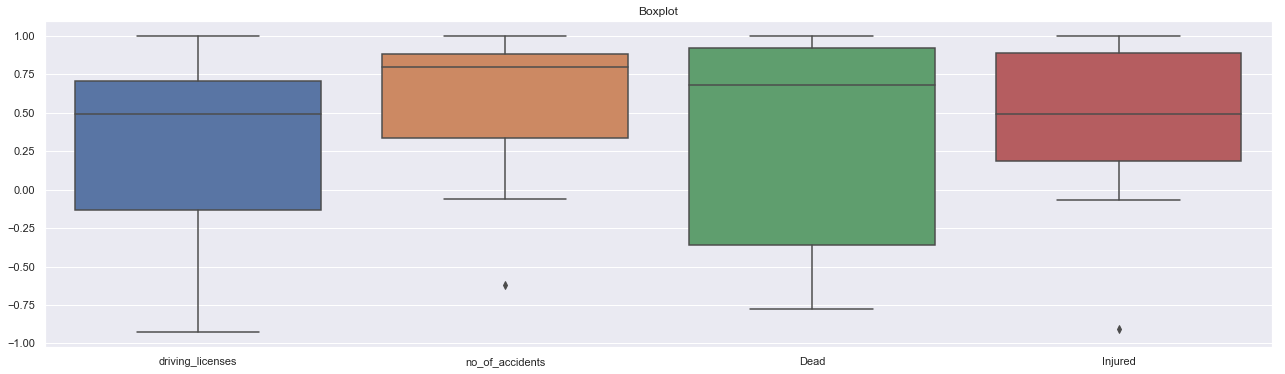

In [246]:
sns.boxplot(data = df_mg[['driving_licenses','no_of_accidents','Dead','Injured']])
sns.set(rc={'figure.figsize':(22,6)})
plt.title('Boxplot')

Text(0, 0.5, 'driving_licenses')

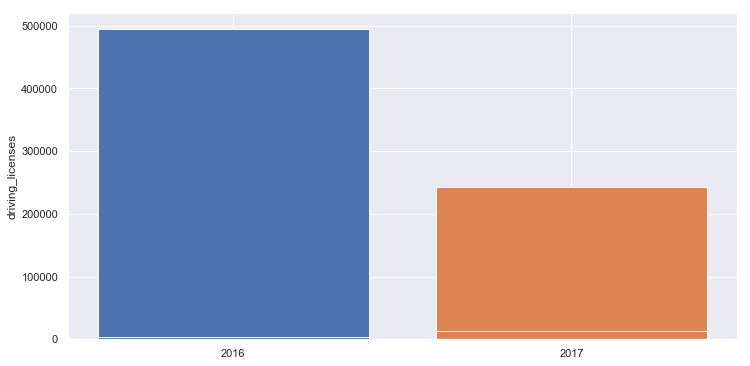

In [261]:
figure(num=None, figsize=(12, 6))
plt.bar(height=pv_mg_2017.driving_licenses,x='2016')
plt.bar(height=pv_mg_2016.driving_licenses,x='2017')
plt.ylabel('driving_licenses')

- #### drivng license number in 2016 is higher than in 2017

Text(0, 0.5, 'no_of_accident')

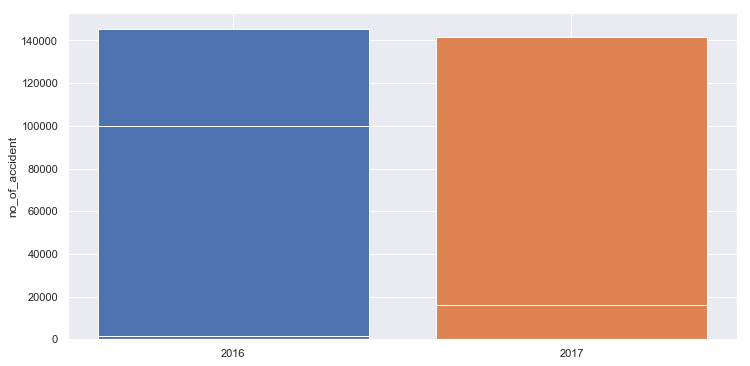

In [264]:
figure(num=None, figsize=(12, 6))
plt.bar(height=pv_mg_2017.no_of_accidents,x='2016')
plt.bar(height=pv_mg_2016.no_of_accidents,x='2017')
plt.ylabel('no_of_accident')

- #### no_of_accidents in 2016 is higher than 2017

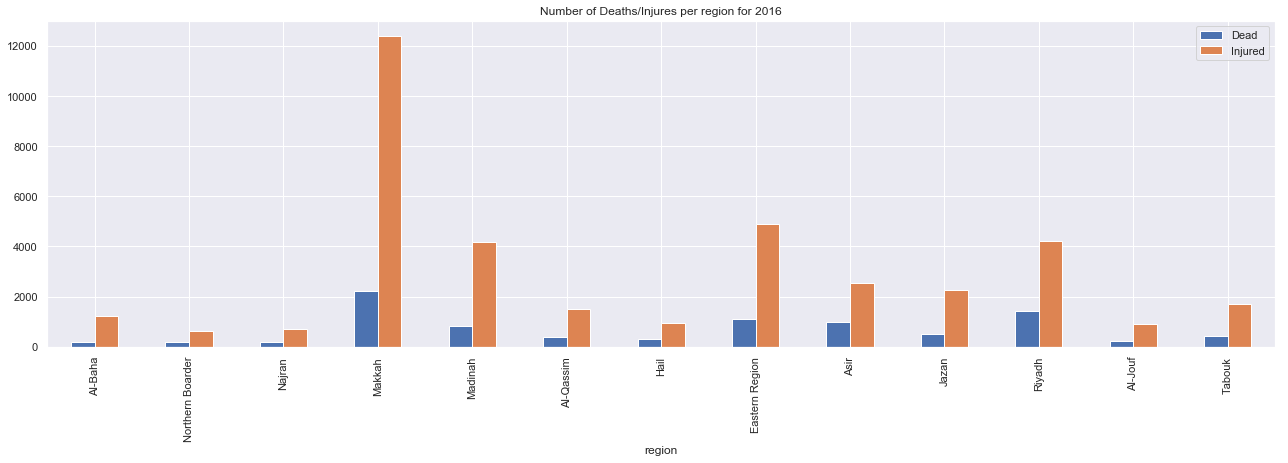

In [249]:
# piv_mg.plt.bar()
ax= piv_mg[piv_mg.year == 2016].drop(columns =['x','y','driving_licenses','no_of_accidents','year'])
ax.plot.bar(x= 'region', title='Number of Deaths/Injures per region for 2016')

- #### Makkah region has the highest no. of deaths and injuries among all other regions in 2016

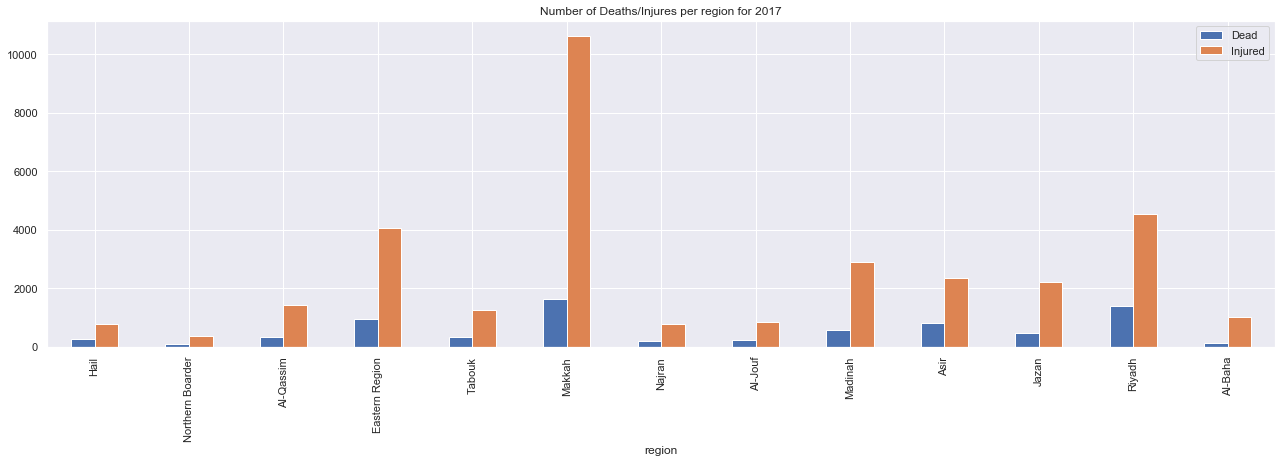

In [256]:
# piv_mg.plt.bar()
ax= piv_mg[piv_mg.year == 2017].drop(columns =['x','y','driving_licenses','no_of_accidents','year'])
ax.plot.bar(x= 'region', title='Number of Deaths/Injures per region for 2017')
# ax.set_title('Number of accidents per region')
plt.show()

- #### Makkah region has the highest number of deaths and injuries in 2017

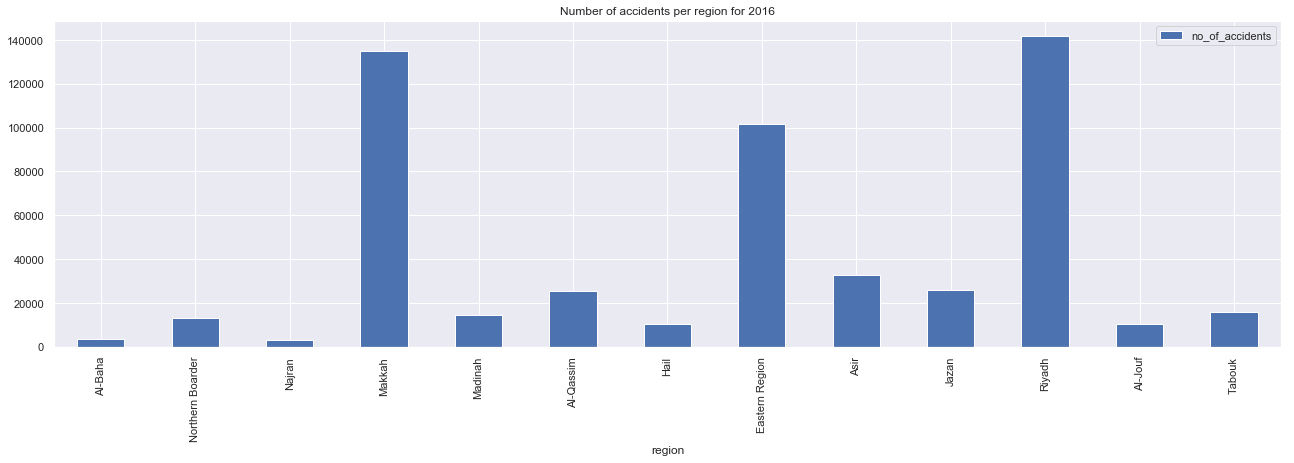

In [251]:
p_mg= piv_mg[piv_mg['year']==2016]
ax= p_mg.drop(columns =['x','y','driving_licenses','year','Dead', 'Injured' ])
ax.plot.bar(x= 'region', title='Number of accidents per region for 2016')

- #### Riyadh has the highest number of accidents in 2016

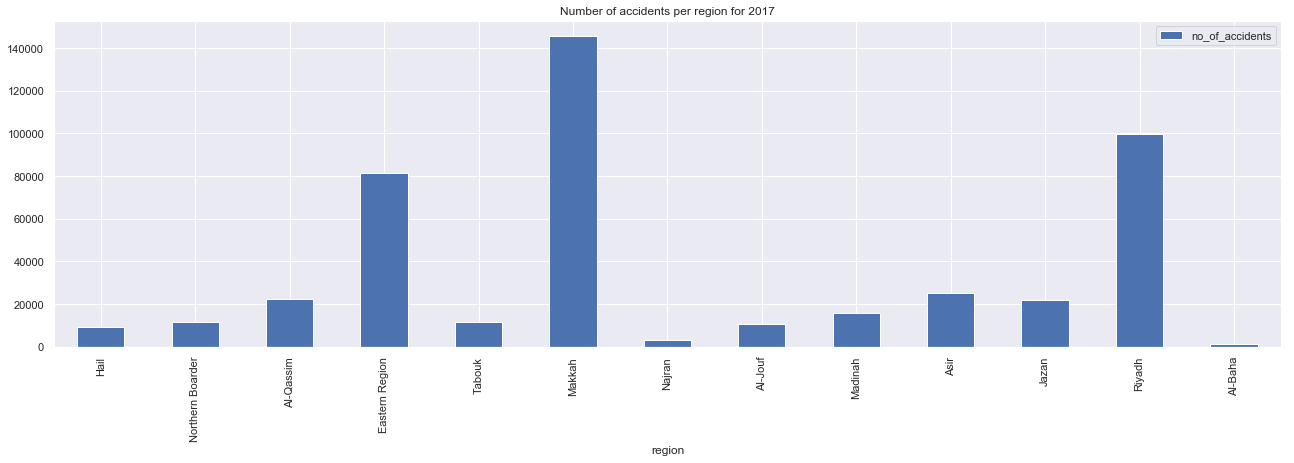

In [257]:
pp_mg= piv_mg[piv_mg['year']==2017]
ax= pp_mg.drop(columns =['x','y','driving_licenses','year','Dead', 'Injured' ])
ax.plot.bar(x= 'region', title='Number of accidents per region for 2017')

- #### Makkah region has the highest number of accidents in 2017


## Descriptive and Inferential Statistics

In [253]:
print(piv_mg.median(),'\n\n',piv_mg.mean())

year                 2016.500000
driving_licenses    16085.000000
x                      23.288331
y                      42.652581
no_of_accidents     16050.500000
Dead                  415.500000
Injured              1618.500000
dtype: float64 

 year                 2016.500000
driving_licenses    62507.000000
x                      22.632136
y                      44.747036
no_of_accidents     38225.692308
Dead                  635.384615
Injured              2743.038462
dtype: float64


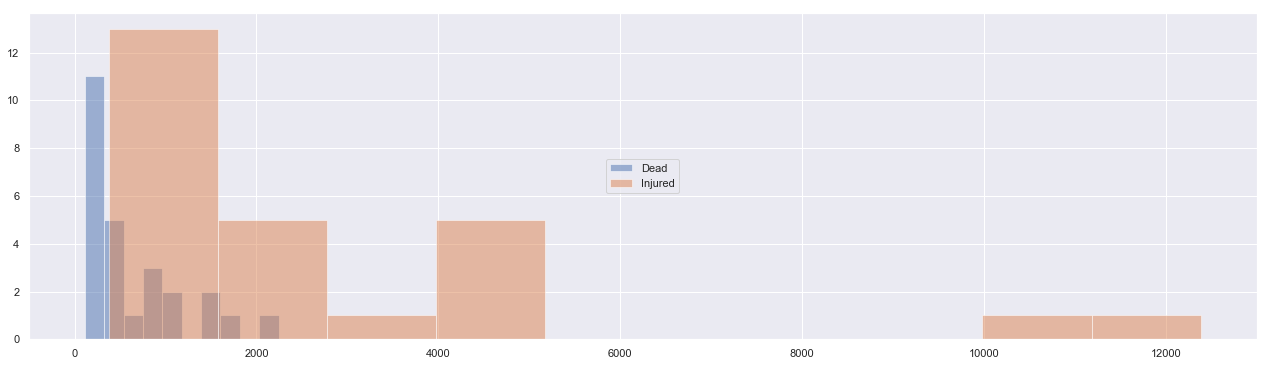

In [254]:
from matplotlib import pyplot


pyplot.hist(piv_mg['Dead'] ,bins= 10, alpha=0.5, label='Dead')
pyplot.hist(piv_mg['Injured'] ,bins= 10, alpha=0.5, label='Injured')
pyplot.legend(loc='center')
pyplot.show()

- #### Based on the decriptive statistics and the  plotted histogram, all  futures are skewd to the right (i.e. postive skew),and the  mean > median > mode.
----------------------------

#### Q. We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
- #### No Because the histogram is not like a bell shaped and not symmetrical. Moreove, the mean is not equal to median and not equal to mode.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents


Answer:
- #### Driving licences and Traffic accidents are both positivlty skewed and hence not normally distributed. To use regression the assumption of normally distributed feature is not valid since there is no normal appear in the plots. The prediction and usage of statistical techniques cannot not applied here and will represent the data efficiently. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [231]:
piv_mg.columns

Index(['year', 'region', 'driving_licenses', 'x', 'y', 'no_of_accidents',
       'Dead', 'Injured'],
      dtype='object')

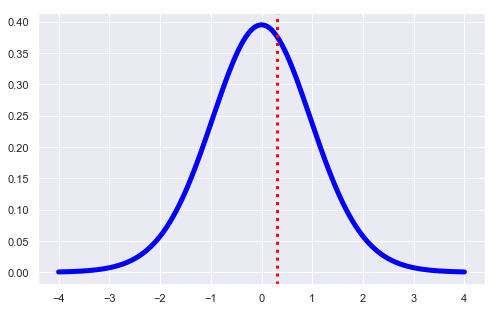

In [232]:
from scipy import stats
import scipy as scipy
import scipy.stats as stats

# Null hypothesis:
#H0: mean dif btw accidents in 2016 = 2017

# Alternative hypothesis:
#H1: mean dif btw accidents in 2016 != 2017

#threshhold for p value is 0.10

t_test_result = stats.ttest_ind(pv_mg_2016['no_of_accidents'],pv_mg_2017['no_of_accidents'])
t_test_result.statistic, t_test_result.pvalue

xpts = np.linspace(-4, 4, 500)
ypts = stats.t.pdf(xpts, len(pv_mg_2016['no_of_accidents']) + len(pv_mg_2017['no_of_accidents']) - 2, 0, 1)

fig = plt.figure(figsize=(8, 5)) # set figure size on fig
ax = fig.gca() # get the current axis from the figure initiated
ax.plot(xpts, ypts, linewidth=5, color='Blue')
ax.axvline(t_test_result.statistic, color='red', lw=3, linestyle=':')
plt.show()

## Conclusions and Recommendations

- Based on the exploration of the data, what are the key takeaways and recommendations?
- #### Ans: Based on the features given in the data sets, we cannot come up with more informative analysis. However, it is enough to show us the current situation. As the accidents are inventible, it can be minimized. A strict low enforcement of  the traffic violations can highly affect the total number of accident and hence decrease the numbers of injuries and deaths. Awareness social campaigns that showcase the injuries and deaths caused by traffic violation also is important to remind people that they must obey the rules and respect the road and the other drives to avoid any loss.




- Are there additional data you desire that would better inform your investigations?
- #### If we had more features like road type, type of accidents, etc .. we could come with a better solutions
